In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [76]:
dataset = pd.read_csv('./data/student_performance.csv')

In [13]:
dataset.head(10)

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
5,1006,18,0,0,1,8.191219,0,0,1,1,0,0,0,3.084184,1.0
6,1007,15,0,1,1,15.601680,10,0,3,0,1,0,0,2.748237,2.0
7,1008,15,1,1,4,15.424496,22,1,1,1,0,0,0,1.360143,4.0
8,1009,17,0,0,0,4.562008,1,0,2,0,1,0,1,2.896819,2.0
9,1010,16,1,0,1,18.444466,0,0,3,1,0,0,0,3.573474,0.0


### Checking Values

In [14]:
dataset.isnull().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [77]:
dataset['GradeClass'] = dataset['GradeClass'].astype(int)
dataset.to_csv('student_performance_class.csv', index=False)

In [78]:
dataset

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1


### Exploring dataset

(array([ 107.,    0.,  269.,    0.,    0.,  391.,    0.,  414.,    0.,
        1211.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

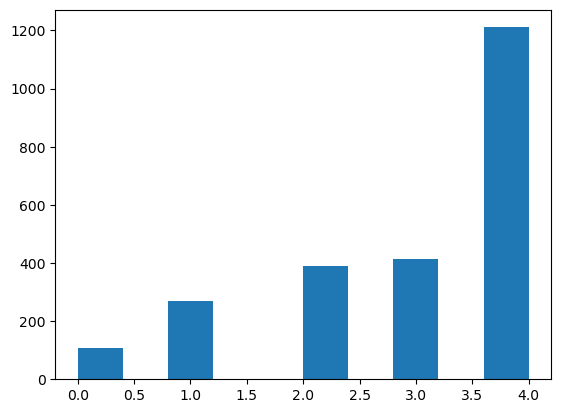

In [15]:
plt.hist(x = dataset['GradeClass'])

In [16]:
graphic = px.treemap(dataset, path = ['GradeClass', 'Age', 'Gender'])
graphic.show()

### Separing predictors and class

In [46]:
dataset = dataset.drop(columns = ['StudentID'])

In [51]:
X_data = dataset.iloc[:, 0:13].values

In [52]:
X_data

array([[17.        ,  1.        ,  0.        , ...,  1.        ,
         0.        ,  2.92919559],
       [18.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  3.04291483],
       [15.        ,  0.        ,  2.        , ...,  0.        ,
         0.        ,  0.11260225],
       ...,
       [16.        ,  1.        ,  0.        , ...,  0.        ,
         1.        ,  1.14233288],
       [16.        ,  1.        ,  1.        , ...,  1.        ,
         0.        ,  1.80329676],
       [16.        ,  1.        ,  0.        , ...,  0.        ,
         1.        ,  2.14001388]])

In [54]:
Y_data = dataset.iloc[:, 13].values

In [55]:
Y_data

array([2., 1., 4., ..., 2., 1., 1.])

### Normalizing numerical values

In [26]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [59]:
ohe = ColumnTransformer(
    transformers = [
        ('scaler', StandardScaler(), list(range(13)))
    ],
)

In [60]:
X_data = ohe.fit_transform(dataset.iloc[:, 0:13])

In [62]:
X_data

array([[ 0.47291901,  0.97849211, -0.85339088, ...,  2.01954358,
        -0.43186565,  1.11808631],
       [ 1.36294441, -1.02198065, -0.85339088, ..., -0.49516139,
        -0.43186565,  1.24237446],
       [-1.30713178, -1.02198065,  1.09164102, ..., -0.49516139,
        -0.43186565, -1.96027719],
       ...,
       [-0.41710638,  0.97849211, -0.85339088, ..., -0.49516139,
         2.31553495, -0.83484487],
       [-0.41710638,  0.97849211,  0.11912507, ...,  2.01954358,
        -0.43186565, -0.11245195],
       [-0.41710638,  0.97849211, -0.85339088, ..., -0.49516139,
         2.31553495,  0.25555918]])

### Dividing the training and testing data

In [61]:
from sklearn.model_selection import train_test_split

In [63]:
X_data_train, X_data_test, Y_data_train, Y_data_test = train_test_split(X_data, Y_data, test_size = 0.15, random_state = 0)

In [64]:
X_data_train.shape, Y_data_train.shape

((2033, 13), (2033,))

In [65]:
X_data_test.shape, Y_data_test.shape

((359, 13), (359,))

### Saving processed variables

In [ ]:
import pickle

with open('./data/student_perfomance.pkl', mode = 'wb') as f: 
    pickle.dump((X_data_train, Y_data_train, X_data_test, Y_data_test), f)